[7:43:45.022572119] [41921]  INFO Camera camera_manager.cpp:330 libcamera v0.5.2+99-bfd68f78
[7:43:45.045394647] [41922]  INFO IPAProxy ipa_proxy.cpp:180 Using tuning file /usr/share/libcamera/ipa/rpi/vc4/ov5647.json
[7:43:45.051238384] [41922]  INFO Camera camera_manager.cpp:220 Adding camera '/base/soc/i2c0mux/i2c@1/ov5647@36' for pipeline handler rpi/vc4
[7:43:45.051277902] [41922]  INFO RPI vc4.cpp:440 Registered camera /base/soc/i2c0mux/i2c@1/ov5647@36 to Unicam device /dev/media3 and ISP device /dev/media0
[7:43:45.051310346] [41922]  INFO RPI pipeline_base.cpp:1107 Using configuration file '/usr/share/libcamera/pipeline/rpi/vc4/rpi_apps.yaml'
[7:43:45.060432594] [41921]  INFO Camera camera.cpp:1215 configuring streams: (0) 640x480-XRGB8888/SMPTE170M/Rec709/None/Full (1) 640x480-SGBRG10_CSI2P/RAW
[7:43:45.060856051] [41922]  INFO RPI vc4.cpp:615 Sensor: /base/soc/i2c0mux/i2c@1/ov5647@36 - Selected sensor format: 640x480-SGBRG10_1X10/RAW - Selected unicam format: 640x480-pGAA/RAW


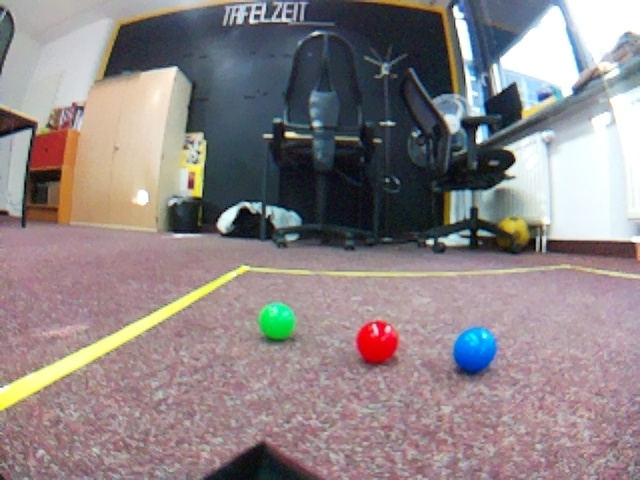

In [1]:
#13
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting
import cv2  # Import the OpenCV library for image processing
from picamera2 import Picamera2  # Import the Picamera2 library for accessing the Raspberry Pi Camera
import numpy as np  # Import the NumPy library for mathematical computations
from IPython.display import display, Image  # Import IPython display functionality
# import ipywidgets as widgets  # Import the ipywidgets library for creating interactive widgets
import threading  # Import the threading library for multithreading
from time import sleep

# Create a toggle button as a stop button
# stopButton = widgets.ToggleButton(
    # value=False,  # The initial state of the button is unselected
    # description='Stop',  # Text displayed on the button
    # disabled=False,  # The button is initially enabled
    # button_style='danger',  # The button style is red
    # tooltip='Description',  # Tooltip displayed when hovering over the button
    # icon='square'  # Icon displayed on the button
# )

# Define a function for displaying the video stream
def view():
    # If you are using a CSI camera, uncomment the picam2 related code below, 
    # and comment out the camera related code.
    # This is because the latest version of OpenCV (4.9.0.80) no longer supports CSI cameras, 
    # and you need to use picamera2 to capture camera images.
    
    picam2 = Picamera2()  # Create an instance of Picamera2
    #Configure camera parameters, set video format and size
    picam2.configure(picam2.create_video_configuration(main={"format": 'XRGB8888', "size": (640, 480)}))
    picam2.start()  # Start the camera
    
    #camera = cv2.VideoCapture(-1)
    #camera.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    #camera.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    display_handle=display(None, display_id=True)  # Create a display handle for updating the displayed content
    while True:
        #sleep(0.01)
        frame = picam2.capture_array()  # Capture a frame from the camera
        #_, frame = camera.read()
        
        # You can perform frame processing here if needed (e.g., flipping, color conversion, etc.)

        _, frame = cv2.imencode('.jpeg', frame)  # Encode the frame as JPEG format
        display_handle.update(Image(data=frame.tobytes()))  # Update the displayed image
        # if stopButton.value==True:  # Check if the stop button is pressed
            # picam2.close()  # If yes, close the camera
            # cv2.release() # If yes, close the camera
            # display_handle.update(None)  # Clear the displayed content

# Display the stop button
# display(stopButton)
sleep(2)
# Create and start a thread, with the target function as view and the stop button as the argument
thread = threading.Thread(target=view)
thread.start()  # Start the thread